In [3]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
import random

from sys import version
print(version)

from sys import version
print(version)

from functools import partial

from IPython.display import display, IFrame

width, height = (560, 315, )

def _iframe_attrs(embed_url):
    """Get IFrame args."""
    return (
        ('src', 'width', 'height'), 
        (embed_url, width, height, ),
    )

def _get_args(embed_url):
    """Get args for type to create a class."""
    iframe = dict(zip(*_iframe_attrs(embed_url)))
    attrs = {
        'display': partial(display, IFrame(**iframe)),
    }
    return ('YouTubeVideo', (object, ), attrs, )

def youtube_video(embed_url):
    """Embed YouTube video into a notebook.

    Place this module into the same directory as the notebook.

    >>> from embed import youtube_video
    >>> youtube_video(url).display()
    """
    YouTubeVideo = type(*_get_args(embed_url)) # make a class
    return YouTubeVideo() # return an object


3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 09:55:02) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 09:55:02) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]


In [4]:
youtube_video("https://www.youtube.com/embed/FNg5_2UUCNU").display()

In [7]:
from IPython.core.display import display, HTML
display(HTML("""<a href="https://google.at">text</a>"""))

## First Let's Do HyperBeast

In [2]:
r = requests.get('https://hypebeast.com/popular')

soup = BeautifulSoup(r.content)
a_s = soup.find_all('a', class_='title')

#for x in a_s:
    #print(x)
    
urls = []
for block in a_s:
    try:
        urls.append(block['ga-event-label'])
    except:
        pass

#urls = [block['ga-event-label'] for blcok in a_s]
titles = [block['title'] for block in a_s]
sources = ['hyperbeast' for x in titles]

df = pd.DataFrame()
df['title'] = titles
df['source'] = sources
df['url'] = urls
df_full = df
df_full.tail()

NameError: name 'requests' is not defined

## Now Ebay Trending

In [3]:
r = requests.get('https://www.ebay.com/trending')
soup = BeautifulSoup(r.content, 'lxml')


#print(soup)
a_s = soup.find_all('a')
titles = []
urls = []
for block in a_s:
    try:
        #print(block['title'])
        titles.append(block['title'])
        urls.append(block['href'])
    except:
        pass
titles = list(titles)
urls = list(urls)
sources = ['ebay' for x in urls]
print(len(sources))
print(len(urls))
print(len(titles))


print(len(urls))
df = pd.DataFrame()
df['title'] = titles
df['source'] = sources
df['url'] = urls

print(df_full.columns, df.columns)
df_full = df_full.append(df).drop_duplicates().reset_index()
df_full.tail()

#print(soup)




137
137
137
137
Index(['title', 'source', 'url'], dtype='object') Index(['title', 'source', 'url'], dtype='object')


,index,title,source,url
61,125,2007 Jaguar XK XK8,ebay,http://www.ebay.com/itm/2007-Jaguar-XK-XK8/123...
62,128,2013 Jaguar XK Special Edition,ebay,http://www.ebay.com/itm/2013-Jaguar-XK-Special...
63,131,2011 Jaguar XK XKR Coupe,ebay,http://www.ebay.com/itm/2011-Jaguar-XK-XKR-Cou...
64,135,Collection of products named Jaguar XK,ebay,https://www.ebay.com/sch/i.html?_from=R40&_nkw...
65,136,Verify site's SSL certificate,ebay,https://trustsealinfo.websecurity.norton.com/s...


In [35]:
r = requests.get('https://trends.google.com/trends/trendingsearches/daily/rss?geo=US')
#<script type="text/javascript" src="https://ssl.gstatic.com/trends_nrtr/1644_RC01/embed_loader.js"></script> <script type="text/javascript"> trends.embed.renderWidget("dailytrends", "", {"geo":"US","guestPath":"https://trends.google.com:443/trends/embed/"}); </script> 
soup = BeautifulSoup(r.content, 'lxml')
print(soup)

<?xml version='1.0' encoding='UTF-8' standalone='yes'?><html><body><rss version="2.0" xmlns:atom="http://www.w3.org/2005/Atom" xmlns:ht="https://trends.google.com/trends/trendingsearches/daily">
<channel>
<title>Daily Search Trends</title>
<description>Recent searches</description>
<link/>https://trends.google.com/trends/trendingsearches/daily?geo=US
		<atom:link href="https://trends.google.com/trends/trendingsearches/daily/rss?geo=US" rel="self" type="application/rss+xml"></atom:link>
<item>
<title>Dallas Cowboys</title>
<ht:approx_traffic>2,000,000+</ht:approx_traffic>
<description>Cowboys, Colt McCoy, redskins vs cowboys, Redskins, cowboys game, Adrian Peterson, Amari Cooper, washington redskins, Dak Prescott, cowboys vs redskins 2018, cowboys score, Ezekiel Elliott, dallas cowboys game, redskins quarterback</description>
<link/>https://trends.google.com/trends/trendingsearches/daily?geo=US#Dallas%20Cowboys
			<pubdate>Thu, 22 Nov 2018 00:00:00 -0800</pubdate>
<ht:picture>https://en

# WordCloud Time!

In [21]:
text = ' '.join(df_full[df_full['source'] == 'hyperbeast'].title.tolist())
text = ' '.join(df_full.title.tolist())
print(text)

These Are The Best Gaming/Tech Deals on Black Friday SNKRS Restocked a Ton of Jordan Releases for Thanksgiving 8 Drops You Don't Want to Miss This Week UPDATE: The Pokémon x Tamagotchi Collaboration Now Has a Release Date Eminem Tackles Critics With Black Friday Capsule Collection UPDATE: New Samsung Leak Suggests Massive Upgrade for Galaxy S10 A Detailed Look at the Nike Air Fear of God 1 The Best Fashion & Footwear Sales for Black Friday & Cyber Monday This Life-Sized Vegeta Statue Costs $3,990 USD Pusha T Attacked on Stage in Toronto Advanced Search Your shopping cart Collection of products named Pokémon: Let's Go Nintendo Switch Pokemon Let's Go Pikachu & Eevee Edition Game w/ Poké Ball Plus Pokemon Let's Go - Shiny Pokemons 6 IV Lets go Pick your Pokemon [Fast Delivery] Switch-Pokemon: Let`s Go Pikachu /Switch (UK IMPORT) GAME NEW Pokemon Lets Go! Pikachu with Pokeball Plus Bundle Switch New In Stock Collection of products named Yeezy Boost 350 V2 Zebra Adidas Yeezy Boost 350 V2 Z

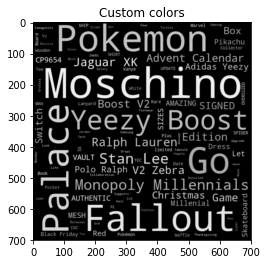

In [28]:
from wordcloud import WordCloud, STOPWORDS
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)
mask = np.array(Image.open("noun_Flight_1442204.png"))

stopwords = set(STOPWORDS)
stop_list = ['products', 'collection', 'named', 'new', 'urpdate', 
             'release', 'best', 'deals', 'restocked', 'size']
for sw in stop_list:
    stopwords.add(sw)

wc = WordCloud(max_words=100, mask=mask, stopwords=stopwords, margin=10,
               random_state=1).generate(text)
# store default colored image
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
